In [1]:
#import necessary libraries
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import os
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
# Function to extract features from an image using VGG16
def extract_features(img_path, model):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        return features.flatten()
    except UnidentifiedImageError:
        print(f"Warning: Unable to process image {img_path}")
        return None

In [3]:
# Function to recommend similar dresses based on features
def recommend_similar_dresses(query_img_path, features_list, file_names, top_n=5):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)
    query_features = extract_features(query_img_path, model)
    similarities = cosine_similarity([query_features], features_list)
    similar_indices = similarities.argsort()[0][-top_n:][::-1]
    similar_dresses = [(file_names[i], similarities[0][i]) for i in similar_indices]
    return similar_dresses

In [4]:
# Load saved features and file names
features_file = 'dress_features.pkl'
with open(features_file, 'rb') as f:
    data = pickle.load(f)
    features_list = data['features']
    file_names = data['file_names']

In [11]:
# Example usage: recommend similar dresses for a query image
query_image_path = r'C:/Users/RAMIZ/Desktop/Wahy/Notes/Project/women_fashion/ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg'
similar_dresses = recommend_similar_dresses(query_image_path, features_list, file_names)

1/1 [==============================] - 0s 350ms/step


In [12]:
# Print recommended dresses
print('Recommended dresses:')
for dress, similarity in similar_dresses:
    print(f'Dress: {dress}, Similarity: {similarity:.2f}')

Recommended dresses:
Dress: ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg, Similarity: 1.00
Dress: bright red, form-fitting, strapless dress with a high slit on one side revealing part of the leg.jpg, Similarity: 0.41
Dress: fitted black dress that reaches down to mid-calf.jpg, Similarity: 0.35
Dress: classic black slip dress with a midi length.jpg, Similarity: 0.33
Dress: royal blue off-shoulder dress.jpg, Similarity: 0.32


In [13]:
# Display the query image and the recommended images
def display_images(query_image_path, similar_dresses, dataset_dir):
    plt.figure(figsize=(15, 10))
    
    # Show query image
    plt.subplot(2, 3, 1)
    query_img = image.load_img(query_image_path, target_size=(224, 224))
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')
    
    # Show similar images
    for i, (img_name, similarity) in enumerate(similar_dresses):
        plt.subplot(2, 3, i+2)
        img_path = os.path.join(dataset_dir, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"Similar: {similarity:.2f}")
        plt.axis('off')
    
    plt.show()




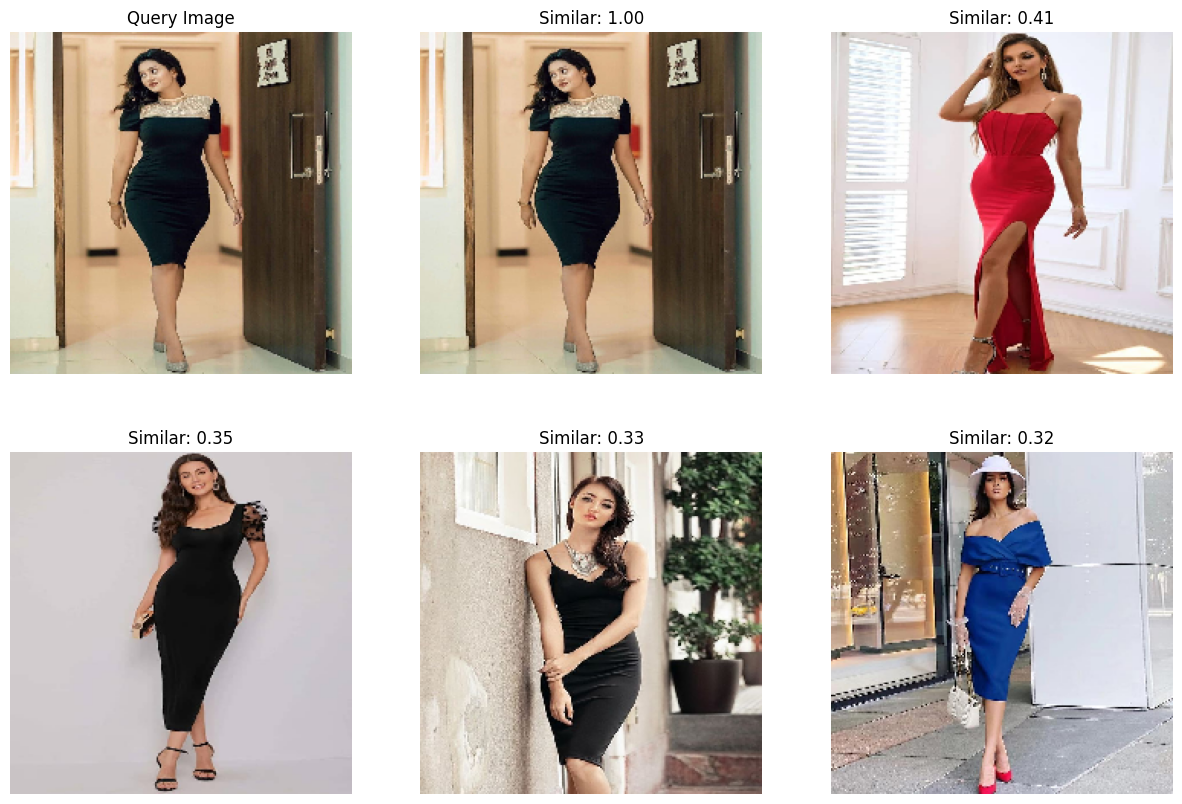

In [14]:
# Directory containing the dataset images
dataset_dir = r'C:\Users\RAMIZ\Desktop\Wahy\Notes\Project\women_fashion'  
display_images(query_image_path, similar_dresses, dataset_dir)